In [1]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.0 MB/s eta 0:00:00


In [7]:
import pandas as pd
import mlxtend

from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt

In [9]:
titanic = pd.read_csv("Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


#### Observations
- All columns are object data type and categorical in nature
- There are no null values
- As the columns are categorical,we can adopt one-hot-encoding

<BarContainer object of 4 artists>

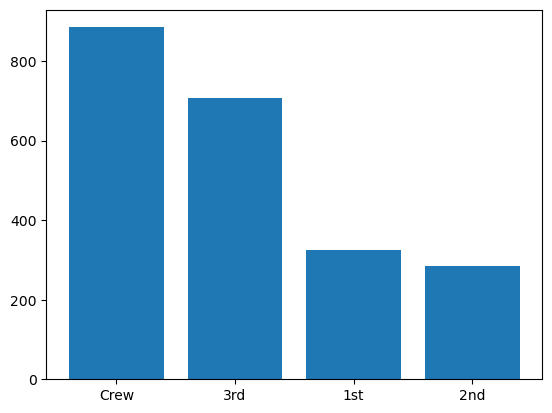

In [24]:
counts = titanic['Class'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 2 artists>

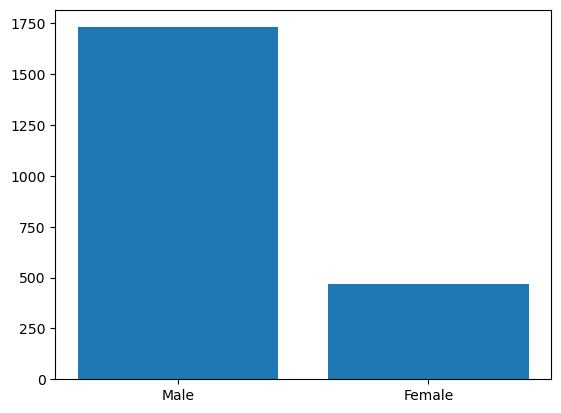

In [30]:
counts = titanic['Gender'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 2 artists>

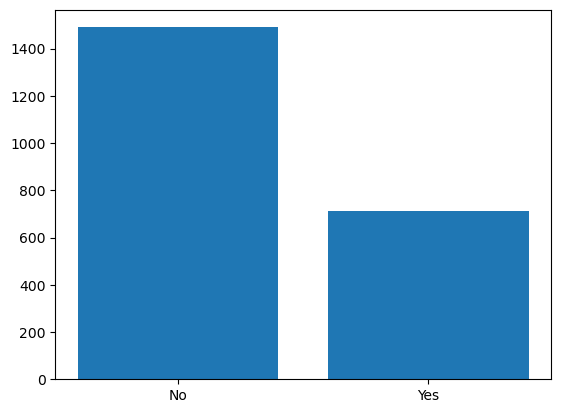

In [34]:
counts = titanic['Survived'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 2 artists>

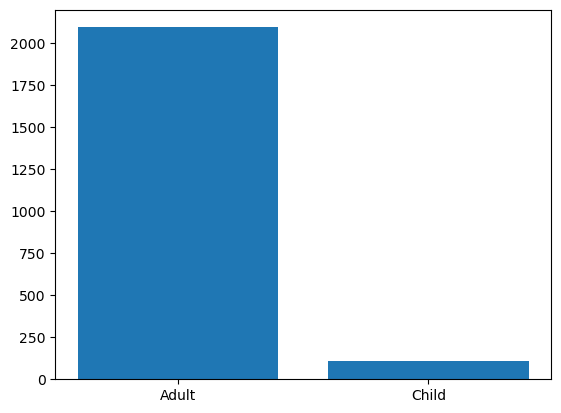

In [38]:
counts = titanic['Age'].value_counts()
plt.bar(counts.index, counts.values)

In [40]:
df = pd.get_dummies(titanic, dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


#### Apriori algorithm

In [45]:
# apply apriori algorithm to get itemset combinations
frequent_itemsets = apriori(df, min_support = 0.5,  use_colnames=True, max_len=None)
frequent_itemsets

C:\Users\adava\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.786461,(Gender_Male)
1,0.950477,(Age_Adult)
2,0.676965,(Survived_No)
3,0.757383,"(Age_Adult, Gender_Male)"
4,0.619718,"(Survived_No, Gender_Male)"
5,0.653339,"(Survived_No, Age_Adult)"
6,0.603816,"(Survived_No, Age_Adult, Gender_Male)"


In [49]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,1.0,0.009870,1.051116,0.263149,0.773191,0.048630,0.879936
1,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,1.0,0.009870,1.339441,0.061028,0.773191,0.253420,0.879936
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,1.0,0.087312,2.525187,0.436144,0.734518,0.603990,0.851710
3,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,1.0,0.087312,1.523634,0.659783,0.734518,0.343674,0.851710
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,1.0,0.089991,2.817152,0.429921,0.722283,0.645032,0.845982
7,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,1.0,0.014788,1.929980,0.064404,0.624824,0.481860,0.804809
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,1.0,0.091095,1.593193,0.621823,0.727024,0.372330,0.844593
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,1.0,0.091095,2.245337,0.467023,0.727024,0.554633,0.844593


In [51]:
rules.sort_values(by='lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,1.0,0.091095,1.593193,0.621823,0.727024,0.372330,0.844593
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,1.0,0.091095,2.245337,0.467023,0.727024,0.554633,0.844593
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,1.0,0.089991,2.817152,0.429921,0.722283,0.645032,0.845982
11,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,1.0,0.089991,1.492710,0.697935,0.722283,0.330078,0.845982
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,1.0,0.087312,2.525187,0.436144,0.734518,0.603990,0.851710
3,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,1.0,0.087312,1.523634,0.659783,0.734518,0.343674,0.851710
7,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,1.0,0.014788,1.929980,0.064404,0.624824,0.481860,0.804809
10,(Age_Adult),"(Survived_No, Gender_Male)",0.950477,0.619718,0.603816,0.635277,1.025106,1.0,0.014788,1.042660,0.494550,0.624824,0.040914,0.804809
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241


#### Observations
- adult females travelling in 1st class were among the most survives

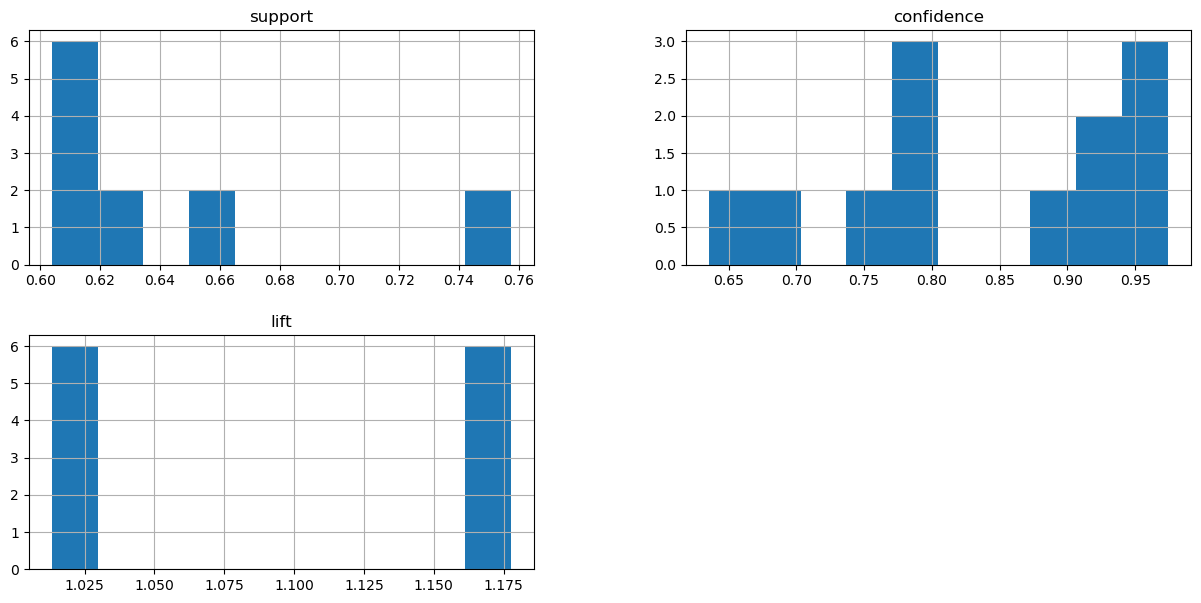

In [56]:
import matplotlib.pyplot as plt
rules[['support', 'confidence', 'lift']].hist(figsize=(15,7))
plt.show()

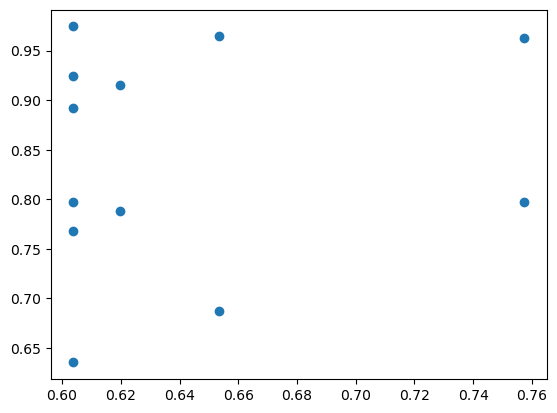

In [60]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

#### The confidence value is increasing with increase in support for most

In [ ]:
rules[rules["consequents"]== ({'Survived_Yes